# SVM 
---


In [245]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
from sklearn import datasets 

data = datasets.load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [247]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [248]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

* dict타입이기 때문에 key 확인 가능

In [249]:
data['feature_names'], len(data['feature_names'])

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 30)

* feature는 30개

In [250]:
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


* dataframe 형태로 바꿈

In [251]:
df_X.shape

(569, 30)

In [252]:
df_y = pd.DataFrame(data.target, columns=['target'])
df_y.shape

(569, 1)

In [253]:
df_X.isna().sum(axis=0)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [254]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [255]:
df_y.value_counts() # 너무 몰리지는 않았는지 확인

target
1         357
0         212
dtype: int64

* data확인

## 학습/테스트 data 분리

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                 test_size = 0.2, 
                 shuffle = True, 
                 random_state = 2022, 
                 stratify = df_y)

In [257]:
X_train.shape, y_train.shape

((455, 30), (455, 1))

In [258]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
193,12.340,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,0.06937,...,15.65,39.34,101.70,768.9,0.17850,0.4706,0.4425,0.14590,0.3215,0.12050
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.1678,0.1397,0.05087,0.3282,0.08490
41,10.950,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.19090,0.2698,0.4023,0.14240,0.2964,0.09606
344,11.710,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,0.06506,...,13.06,18.16,84.16,516.4,0.14600,0.1115,0.1087,0.07864,0.2765,0.07806
536,14.270,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,0.1926,0.05982,...,15.29,34.27,104.30,728.3,0.13800,0.2733,0.4234,0.13620,0.2698,0.08351


## 표준화

In [259]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = y_train.values.reshape(-1)
y_train.shape

(455,)

## 학습

In [260]:
from sklearn.preprocessing import StandardScaler

In [261]:
from sklearn import svm

In [262]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

## 테스트

In [263]:
X_test = sc.transform(X_test)
y_test = y_test.values.reshape(-1)

In [264]:
y_test[:5]

array([0, 1, 0, 1, 0])

In [265]:
y_pred = clf.predict(X_test)

## 정확도

In [266]:
(y_test == y_pred).sum()/y_test.shape[0]

0.9912280701754386

In [267]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9912280701754386

## confusion matrix 

In [268]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

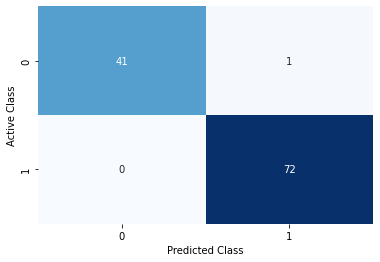

In [269]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot = True, fmt='g', cbar=False, cmap='Blues')
plt.ylabel("Active Class")
plt.xlabel('Predicted Class')
plt.show()

In [270]:
clf = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')
clf.fit(X_train, y_train)

SVC()

In [271]:
y_pred = clf.predict(X_test) 
accuracy_score(y_test,y_pred)

0.9912280701754386

## Hyper parameter Tunning Grid Search 
---
* 최적의 c값을 찾기 위한 Grid search
* 모든 경우를 빈틈없이 

In [277]:
from sklearn.model_selection import GridSearchCV

param = {
    'C':range(1,100),
    'gamma':[0.001,0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'kernel':['rbf']
}
#위의 모든 경우의 수를 다 돌려 볼 것
model = svm.SVC()
grid = GridSearchCV(model, param, refit=True)
# refit : 정해놓은 범위 안에서 최상의 결과를 찾게 되면 그 값으로 저절로 SVC를 다시 학습해줌
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 100),
                         'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
                         'kernel': ['rbf']})

In [278]:
grid.best_params_

{'C': 3, 'gamma': 0.05, 'kernel': 'rbf'}

* 만약 refit = False 라고 했다면 위 정보로 다시 학습을 시켜야 함

In [279]:
best_clf = grid.best_estimator_

In [280]:
grid.best_score_

0.9780219780219781

* test가 아니라 학습할 때 최상의 점수

In [283]:
y_pred = grid.best_estimator_.predict(X_test)

In [284]:
accuracy_score(y_test,y_pred)

0.9824561403508771

* 전혀 모르는 data에 대해 어떻게 반응할지 모르기 때문에 0.99 보다 좋다고 확신할 수 없음

## Hyper parameter Tunning Random Search 
--- 

In [287]:
from sklearn.model_selection import RandomizedSearchCV

In [289]:
from scipy.stats import uniform

param = {
    'C':uniform(),
    'gamma':uniform(),
    'kernel':['rbf']
}
# random search 는 분포안에서 랜덤하게 뽑기 때문에 분포로 만들어서 넣어줘야 함. 
model = svm.SVC()
rs = RandomizedSearchCV(model, param, refit=True)
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018B91213A30>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018B91213AC0>,
                                        'kernel': ['rbf']})

In [290]:
rs.best_params_

{'C': 0.3202228240367968, 'gamma': 0.09607916385758353, 'kernel': 'rbf'}

In [292]:
rs.best_score_

0.9384615384615385

In [293]:
y_pred = rs.best_estimator_.predict(X_test)